For my final analysis for BDI475, I will be applying my data manipulation, transformation, and visualization skills to this Data Science Salaries dataset I found on kaggle. As someone who is graduating in May and also looking for a role in the Data Science industry, I wish to take a look at the average salaries offered to data scientists based on experience, location, company size, residency, and position type. These are all factors that are important to be informed about when applying for jobs for my time after college, so I feel that there is a lot of knowledge waiting to be identified. I understand that this dataset is not the largest, but I am fond of it due to its accuracy and completeness (no N/A values present).  

After looking through the data available to me, these are the questions I want to further investigate using exploratory data analysis methods learned in class as well as my prior knowledge:

-> How do salaries differ by company size?

-> How do Data Science salaries vary by experience level?

-> What proportion of employement types and positions are remote?

-> How do the US salaries compare to other countries among the different positions/job types? 

In [368]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [369]:
df = pd.read_csv("data_science_salary.csv")

In [370]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [371]:
df.shape

(245, 11)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [373]:
df.dropna(inplace=True)

In [403]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
191,2021e,Executive,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
63,2021e,Mid,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
6,2020,Mid,FT,Research Scientist,450000,USD,450000,US,0,US,M
237,2021e,Mid,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
162,2021e,Executive,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
153,2021e,Mid,FT,Data Scientist,420000,INR,5695,IN,100,US,S
21,2021e,Mid,PT,3D Computer Vision Researcher,400000,INR,5423,IN,50,IN,M
218,2021e,Entry,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
147,2021e,Mid,FT,Data Engineer,4000,USD,4000,IR,100,IR,M


In [375]:
df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

In [376]:
df['employee_residence'].unique()

array(['DE', 'GR', 'RU', 'US', 'FR', 'AT', 'CA', 'UA', 'NG', 'PK', 'IN',
       'GB', 'ES', 'IT', 'PL', 'BG', 'PH', 'PT', 'HU', 'SG', 'BR', 'MX',
       'TR', 'NL', 'AE', 'JP', 'JE', 'PR', 'RS', 'KE', 'CO', 'NZ', 'VN',
       'IR', 'RO', 'CL', 'BE', 'DK', 'CN', 'HK', 'SI', 'MD', 'LU', 'HR',
       'MT'], dtype=object)

In [377]:
df['company_location'].unique()

array(['DE', 'US', 'RU', 'FR', 'AT', 'CA', 'UA', 'NG', 'IN', 'ES', 'PL',
       'GB', 'PT', 'DK', 'SG', 'MX', 'TR', 'NL', 'AE', 'JP', 'CN', 'HU',
       'KE', 'CO', 'NZ', 'IR', 'CL', 'PK', 'BE', 'GR', 'SI', 'BR', 'CH',
       'IT', 'MD', 'LU', 'VN', 'AS', 'HR', 'IL', 'MT'], dtype=object)

In [378]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [379]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
244,2021e,SE,FT,Data Science Manager,7000000,INR,94917,IN,50,IN,L


In [380]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
138,2021e,SE,FT,Research Scientist,120500,CAD,96357,CA,50,CA,L
72,2021e,SE,FT,Data Engineering Manager,174000,USD,174000,US,100,US,L
69,2021e,SE,FT,Cloud Data Engineer,160000,USD,160000,BR,100,US,S
115,2021e,EN,FT,Data Science Consultant,65000,EUR,77481,DE,0,DE,L
13,2021e,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
124,2021e,SE,FT,Machine Learning Engineer,4900000,INR,66442,IN,0,IN,L
15,2021e,SE,FT,Data Engineering Manager,153000,USD,153000,US,100,US,L
118,2021e,EN,FT,Data Engineer,55000,EUR,65561,DE,50,DE,M
136,2021e,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
129,2021e,EN,FT,Big Data Engineer,1200000,INR,16271,IN,100,IN,L


In [381]:
df.sort_values('salary_in_usd', ascending = False, inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
191,2021e,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
63,2021e,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
6,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
237,2021e,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
162,2021e,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
153,2021e,MI,FT,Data Scientist,420000,INR,5695,IN,100,US,S
21,2021e,MI,PT,3D Computer Vision Researcher,400000,INR,5423,IN,50,IN,M
218,2021e,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
147,2021e,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M


In [382]:
lowest_pay = df.nsmallest(75, 'salary_in_usd')['salary_in_usd'].unique()
lowest_pay

array([ 2876,  4000,  5423,  5695,  5707,  5898,  6072,  8000,  9272,
       10000, 12000, 13000, 13105, 13400, 15966, 16271, 16949, 18000,
       18102, 19052, 19661, 20000, 21669, 21695, 21843, 21844, 22671,
       24407, 25032, 25747, 26224, 28475, 28608, 28801, 28850, 29831,
       30337, 30509, 33511, 33899, 35735, 36732, 36952, 38144, 38776,
       39916, 40481, 40529, 40798, 41689, 42000, 42197, 43331, 45618,
       45760, 45773, 45896, 46759, 47129, 47204, 47681, 47899, 50000,
       50180, 51321, 51814, 53641, 54238], dtype=int64)

In [383]:
df.groupby(['job_title']).mean().sort_values("salary_in_usd", ascending=False)

,salary,salary_in_usd,remote_ratio
job_title,,,
Financial Data Analyst,4.500000e+05,450000.000000,100.000000
Applied Machine Learning Scientist,4.230000e+05,423000.000000,50.000000
Principal Data Engineer,3.925000e+05,392500.000000,100.000000
Head of Data,2.325000e+05,232500.000000,75.000000
Principal Data Scientist,2.158000e+05,225097.800000,100.000000
Director of Data Science,1.857500e+05,197751.500000,50.000000
ML Engineer,1.800000e+05,180655.333333,100.000000
Machine Learning Scientist,1.805000e+05,180500.000000,62.500000
Data Architect,1.800000e+05,180000.000000,100.000000


In [384]:
df['work_year'].value_counts()

2021e    179
2020      66
Name: work_year, dtype: int64

In [385]:
df['employee_residence'].value_counts().head(10)

US    92
IN    22
DE    19
FR    13
GB    13
CA     9
ES     7
JP     4
GR     4
BR     4
Name: employee_residence, dtype: int64

In [386]:
df['company_location'].value_counts().head(10)

US    108
DE     19
IN     17
GB     16
FR     11
CA     11
ES      7
JP      4
DK      3
PL      3
Name: company_location, dtype: int64

In [387]:
df['company_size'].value_counts()

L    132
S     58
M     55
Name: company_size, dtype: int64

In [388]:
df['experience_level'].value_counts()

MI    103
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64

In [389]:
df['experience_level'].replace(["EN","MI","SE","EX"],
                              ["Entry","Mid","Senior","Executive"],
                              inplace=True)

In [390]:
df['experience_level'].value_counts()

Mid          103
Senior        77
Entry         54
Executive     11
Name: experience_level, dtype: int64

In [391]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [392]:
df.groupby('experience_level').describe()

salary                                                  \
                  count           mean           std      min       25%   
experience_level                                                          
Entry              54.0  365722.518519  7.969949e+05   4000.0   46250.0   
Executive          11.0  220000.000000  1.684672e+05  59000.0  102500.0   
Mid               103.0  706940.883495  3.340945e+06   4000.0   53750.0   
Senior             77.0  365439.181818  1.052029e+06  40000.0   80000.0   

                                                 salary_in_usd                 \
                       50%       75%         max         count           mean   
experience_level                                                                
Entry              76250.0  169500.0   4450000.0          54.0   59753.462963   
Executive         150000.0  280000.0    600000.0          11.0  226288.000000   
Mid                90000.0  143500.0  30400000.0         103.0   85738.135922   
Senior            144000.0  185000.0   7000000.0          77.0  128841.298701   

                  ...                     remote_ratio                        \
                  ...       75%       max        count       mean        std   
experience_level  ...                                                          
Entry             ...   82500.0  250000.0         54.0  70.370370  35.711790   
Executive         ...  280000.0  600000.0         11.0  72.727273  41.009977   
Mid               ...  110000.0  450000.0        103.0  65.048544  39.503631   
Senior            ...  170000.0  412000.0         77.0  73.376623  35.894963   

                                                  
                  min   25%    50%    75%    max  
experience_level                                  
Entry             0.0  50.0  100.0  100.0  100.0  
Executive         0.0  50.0  100.0  100.0  100.0  
Mid               0.0  50.0  100.0  100.0  100.0  
Senior            0.0  50.0  100.0  100.0  100.0  

[4 rows x 24 columns]

Text(0.5, 1.0, 'Salaries by Experience Level')

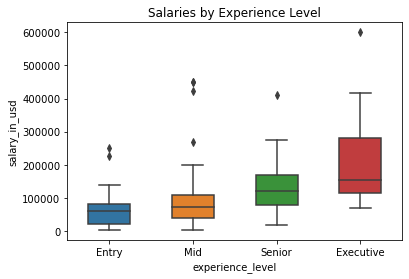

In [393]:
sns.boxplot(x = df["experience_level"],
            y = df["salary_in_usd"],
            order = ["Entry", "Mid", "Senior", "Executive"], 
           width = .5).set_title("Salaries by Experience Level")

Here I wanted to take a look at Data Science salaries among all positions by experience level. I know that as a soon to be college graduate, people in my position have to start from the ground up in terms of salary grades and tax brackets. But how significant is the gap between each of the levels? According to the visual above, by grouping USD salaries by experience level, we can see the median (50%) pay is: 

$76,250 for Entry level jobs

$90,000 for Mid level jobs

$144,000 for Senior level jobs

$150,000 for Executive positions

The increment between an entry and mid level job is almost 14,000 USD. Although the largest gap exists between mid and senior level jobs totalling over $50,000 itself, this number may be inaccurate due to the few outliers. This may be due to the fact that some exployees climbed up the ranks within their company with less experience due to external factors like higher education, references, and job demand. The same can be said about entry level jobs, as there are also outliers that exist for this category of experience. We can also see that the box for executive salaries is the widest margin of where 25% to 75% salaries reported are in comparison of other levels.

In [394]:
df_ft = df[df['employment_type'] == "FT"]
df_ft

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
191,2021e,Executive,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
63,2021e,Mid,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
6,2020,Mid,FT,Research Scientist,450000,USD,450000,US,0,US,M
237,2021e,Mid,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
240,2020,Senior,FT,Data Scientist,412000,USD,412000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
172,2020,Entry,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
153,2021e,Mid,FT,Data Scientist,420000,INR,5695,IN,100,US,S
218,2021e,Entry,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
147,2021e,Mid,FT,Data Engineer,4000,USD,4000,IR,100,IR,M


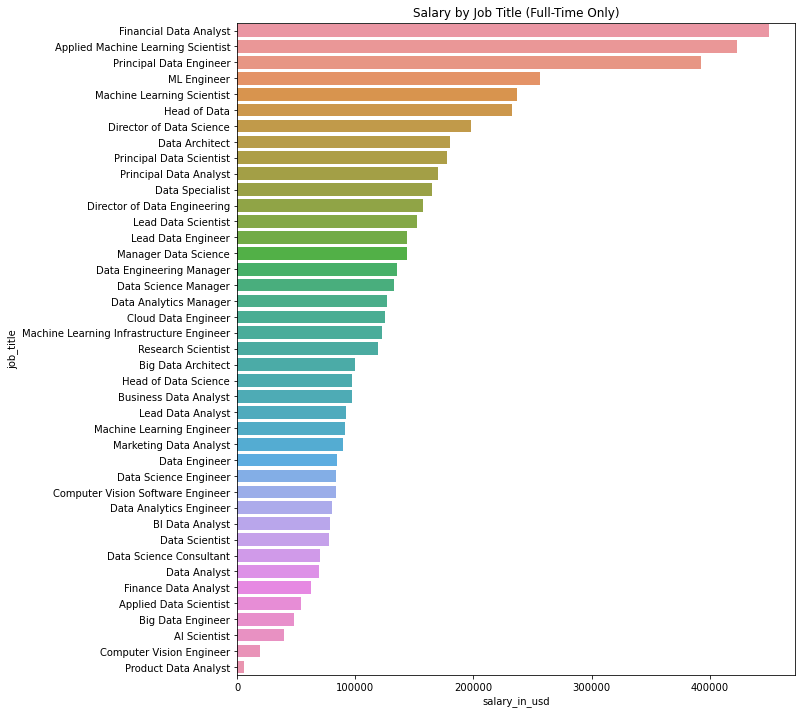

In [395]:
df_salary_by_position = df_ft.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)

plt.subplots(figsize=(10,12))
sns.barplot(x = df_salary_by_position, y = df_salary_by_position.index).set_title("Salary by Job Title (Full-Time Only)")
plt.show()

In this visual I wanted to take a look at the average mean salary of every reported job title regardless of country and experience level. I noticed that 3 of the top 8 job positions are associated with Machine Learning, this makes sense because it is a demanding yet necessary role for a company looking to do work with predictive analytics and artifical intelligence. I can see that Heads, Directors, Principals of Data Science, and Data Architects make over $150,000 on average compared to Managers, Engineers, and Analysts. This also makes sense because the higher paying positions are top of the data pipeline established within companies. This means they are in charge of directing work and managing more projects depending how high up the rank they are. I had to make sure that I only included Full time employees working 40 hours a week otherwise lower salaries due to lower hours would conflict with our data and result in lower mean salaries, leading to inaccuracy. 

In [396]:
df['job_title'].value_counts().head()

Data Scientist               59
Data Engineer                38
Data Analyst                 20
Machine Learning Engineer    20
Research Scientist           10
Name: job_title, dtype: int64

In [397]:
df3 = df[(df['job_title'] == "Data Scientist") |
                  (df['job_title'] == "Data Engineer") |
                  (df['job_title'] == "Data Analyst")]
df4 = df3[(df3['experience_level'] == "Mid")]

df5 = df4[(df4['employment_type'] == "FT")]

In [398]:
df_most = df5[['job_title','salary_in_usd','company_location']]

df_avg = df_most.groupby(['company_location','job_title']).mean().reset_index()

In [399]:
df_mid_level_salary_by_country = df_avg[(df_avg['company_location'] == "US") |
                                        (df_avg['company_location'] == "GB") |
                                        (df_avg['company_location'] == "FR")]
df_mid_level_salary_by_country

,company_location,job_title,salary_in_usd
7,FR,Data Analyst,46759.000000
8,FR,Data Engineer,70139.000000
9,FR,Data Scientist,42197.000000
10,GB,Data Analyst,51814.000000
11,GB,Data Engineer,83965.666667
12,GB,Data Scientist,83706.333333
25,US,Data Analyst,79000.000000
26,US,Data Engineer,111813.545455
27,US,Data Scientist,107982.272727


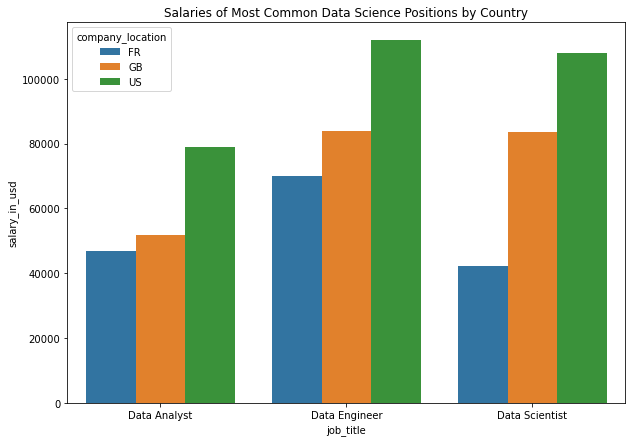

In [400]:
plt.subplots(figsize=(10,7))

sns.barplot(x ="job_title",
            y = 'salary_in_usd',
            data = df_mid_level_salary_by_country,
            hue = "company_location").set_title("Salaries of Most Common Data Science Positions by Country")
plt.show()

Here my goal was to first subset the dataframe into something that only contains the three most common job titles related to data science. I also wanted to make sure this data was normalized for only full time status employees for accurate and realistic annual earnings. Then investigating even further, I wanted to only extract the company countries that had only Data Scientists, Analysts, and Engineers. I was left with France, Great Britain, and the US being the only hosts to the top 3 job titles. Results indicate that the US pays these three Data roles the highest by at least 20,000 USD more than the next highest. Also, I was unsure but can now confirm that Data Engineers earn more than Data Scientists in each of the countries, with each country paying their employee upwards of 18,000 USD than the other roles.

In [401]:
# Webscraping Longitude & Latitude Coordinate Table for Tableau Heatmap Visuals

url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'

dfx = pd.read_html(url)
dfx

dfy = dfx[0]
df_geo = dfy.rename(columns={
    'country': 'employee_residence',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'name': 'Country Name'
})

df_geo

,employee_residence,Latitude,Longitude,Country Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [404]:
# Merging Geotags Coordinates to existing Country Codes

df_join = df.copy()

df_new = pd.merge(df_join, df_geo, on='employee_residence')

# Command for exporting DataFrame to CSV format, Tableau compatible ready for import

# df_new.to_csv(r'C:\Users\Talal Hashmi\Documents\UIUC\BDI 475\case studies\final\data_science_salary_with_geo.csv')